In [ ]:
# Importamos las librerias necesarias.
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# Creamos un tokenizador.
tokenizer = Tokenizer()

data = open('Rimas.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'que': 1, 'y': 2, 'de': 3, 'en': 4, 'el': 5, 'la': 6, 'a': 7, 'un': 8, 'las': 9, 'al': 10, 'yo': 11, 'se': 12, 'rima': 13, 'del': 14, 'me': 15, 'no': 16, 'los': 17, 'con': 18, 'su': 19, 'mi': 20, 'es': 21, 'una': 22, 'como': 23, 'lo': 24, 'tu': 25, 'por': 26, 'ojos': 27, 'tus': 28, 'soy': 29, 'te': 30, 'alma': 31, 'sin': 32, 'qué': 33, 'sé': 34, 'luz': 35, 'mientras': 36, 'sus': 37, 'tú': 38, 'si': 39, 'entre': 40, 'dos': 41, 'cuando': 42, 'corazón': 43, 'ella': 44, 'cielo': 45, 'sobre': 46, 'amor': 47, 'noche': 48, 'ni': 49, 'oro': 50, 'he': 51, 'mar': 52, 'sol': 53, 'porque': 54, 'mis': 55, 'vida': 56, 'o': 57, 'son': 58, 'pero': 59, 'poesía': 60, 'beso': 61, 'mí': 62, 'hoy': 63, 'aire': 64, 'sabe': 65, 'mundo': 66, 'mano': 67, 'sólo': 68, 'labios': 69, 'pupila': 70, 'azul': 71, 'verdes': 72, 'día': 73, 'palabras': 74, 'tiempo': 75, 'pasa': 76, 'espíritu': 77, 'tan': 78, 'fuego': 79, 'ya': 80, 'tierra': 81, 'fin': 82, 'dolor': 83, 'vez': 84, 'pupilas': 85, 'aliento': 86, 'cuanto': 8

In [ ]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['alto'])
print(tokenizer.word_index['marchitas'])
print(tokenizer.word_index['inteligencia'])
print(tokenizer.word_index['tupidas'])
print(tokenizer.word_index['formado'])
print(tokenizer.word_index['a'])
print(tokenizer.word_index['loca'])
print(tokenizer.word_index['pasear'])

1607
1608
1692
1634
1671
7
1721
1720


In [ ]:
print(xs[6])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11  34   8
 175]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11 34  8]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'que': 1, 'y': 2, 'de': 3, 'en': 4, 'el': 5, 'la': 6, 'a': 7, 'un': 8, 'las': 9, 'al': 10, 'yo': 11, 'se': 12, 'rima': 13, 'del': 14, 'me': 15, 'no': 16, 'los': 17, 'con': 18, 'su': 19, 'mi': 20, 'es': 21, 'una': 22, 'como': 23, 'lo': 24, 'tu': 25, 'por': 26, 'ojos': 27, 'tus': 28, 'soy': 29, 'te': 30, 'alma': 31, 'sin': 32, 'qué': 33, 'sé': 34, 'luz': 35, 'mientras': 36, 'sus': 37, 'tú': 38, 'si': 39, 'entre': 40, 'dos': 41, 'cuando': 42, 'corazón': 43, 'ella': 44, 'cielo': 45, 'sobre': 46, 'amor': 47, 'noche': 48, 'ni': 49, 'oro': 50, 'he': 51, 'mar': 52, 'sol': 53, 'porque': 54, 'mis': 55, 'vida': 56, 'o': 57, 'son': 58, 'pero': 59, 'poesía': 60, 'beso': 61, 'mí': 62, 'hoy': 63, 'aire': 64, 'sabe': 65, 'mundo': 66, 'mano': 67, 'sólo': 68, 'labios': 69, 'pupila': 70, 'azul': 71, 'verdes': 72, 'día': 73, 'palabras': 74, 'tiempo': 75, 'pasa': 76, 'espíritu': 77, 'tan': 78, 'fuego': 79, 'ya': 80, 'tierra': 81, 'fin': 82, 'dolor': 83, 'vez': 84, 'pupilas': 85, 'aliento': 86, 'cuanto': 8

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 1000, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=1000, verbose=1)
#print model.summary()
print(model)

Epoch 1/1000
132/132 [==============================] - 31s 199ms/step - loss: 6.7061 - accuracy: 0.0348
Epoch 2/1000
132/132 [==============================] - 26s 198ms/step - loss: 6.0515 - accuracy: 0.0556
Epoch 3/1000
132/132 [==============================] - 27s 203ms/step - loss: 5.7301 - accuracy: 0.0768
Epoch 4/1000
132/132 [==============================] - 26s 197ms/step - loss: 5.3452 - accuracy: 0.1025
Epoch 5/1000
132/132 [==============================] - 27s 203ms/step - loss: 4.8900 - accuracy: 0.1381
Epoch 6/1000
132/132 [==============================] - 27s 203ms/step - loss: 4.4355 - accuracy: 0.1884
Epoch 7/1000
132/132 [==============================] - 26s 197ms/step - loss: 3.9948 - accuracy: 0.2382
Epoch 8/1000
132/132 [==============================] - 26s 198ms/step - loss: 3.5810 - accuracy: 0.2887
Epoch 9/1000
132/132 [==============================] - 26s 198ms/step - loss: 3.2016 - accuracy: 0.3627
Epoch 10/1000
132/132 [==============================] 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

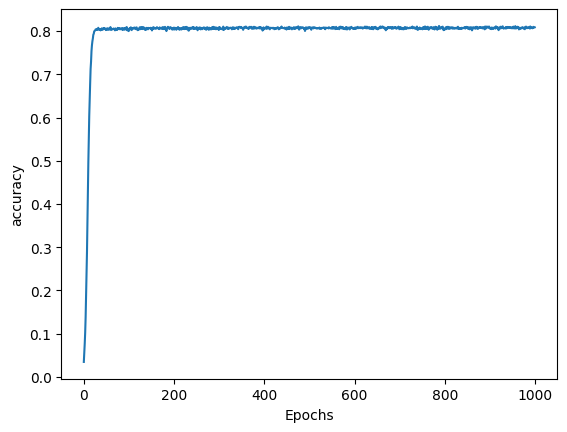

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "Yo veo tus ojos tan hermosos"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 30ms/step
Yo veo tus ojos tan hermosos sólo en mi agonía el reflejo lo extraño ella dijo yo empuja la luz tiene la luz tiene la sintieras sintieras sintieras sintieras sintieras sintieras deslizándose hojas hojas día día día ardiente notas mi sintieras constante vacío sintieras sintieras sintieras sintieras vida vacío verdes constante altar altar mar altar mar altar mi sintieras constante vacío sintieras sintieras sintieras sintieras vacío altar constante altar mar altar ciego amigo es sintieras sintieras mano átomos átomos átomos sobre sintieras sintieras tiempo mano dijo pupilas sintieras sintieras sintieras sintieras sintieras sintieras donde eterna sintieras eterna conservemos otro con son verdes tuvo sólo tiempo diga
